<a href="https://colab.research.google.com/github/sarahrdk/EscapeEarth/blob/main/Interns/Sarah/What_are_LightCurve_objects%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightkurve

In [2]:
from lightkurve import search_targetpixelfile
# First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
tpf = search_targetpixelfile('KIC 6922244', quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [3]:
#acess metadata
lc.mission
lc.quarter

4

In [4]:
#time and flux data (only one flux point for every time stamp)
lc.time, lc.flux

(array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
        442.18306983, 442.2035041 ]),
 array([43689.15 , 43698.08 , 43694.105, ..., 43155.8  , 43148.465,
        43151.562], dtype=float32))

In [5]:
#noise metric of lightcurve
lc.estimate_cdpp()

75.2986784032268

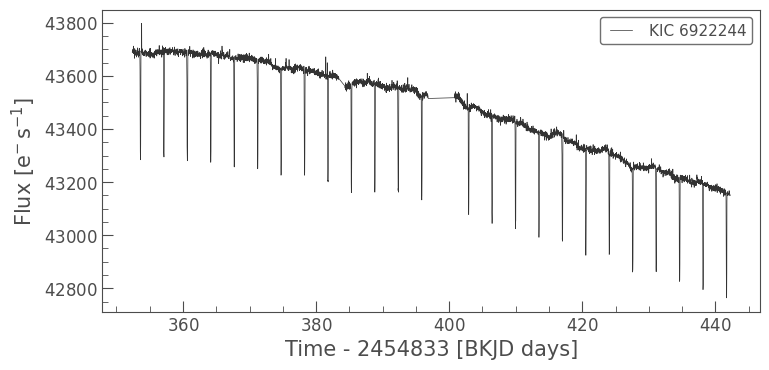

In [6]:
#plot time series
%matplotlib inline
lc.plot();

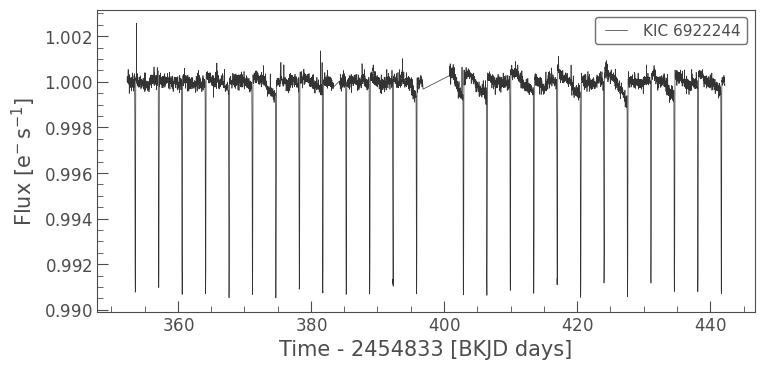

In [7]:
#flatten() - remove long term trends
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

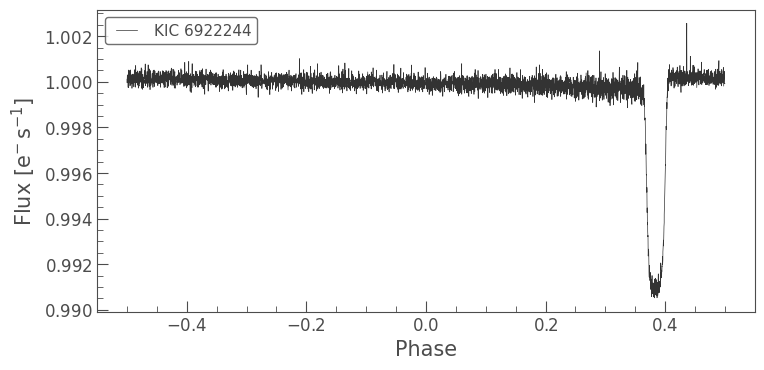

In [8]:
#fold() - fold the data at a particular period
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

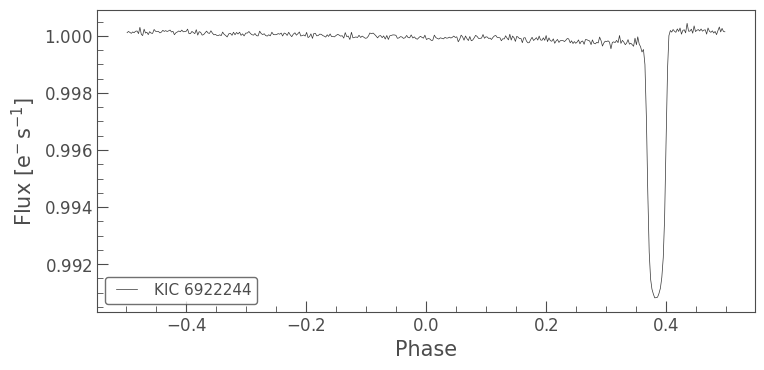

In [9]:
#bin() - reduce time resolution of each array, taking the avg value of each bin
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();

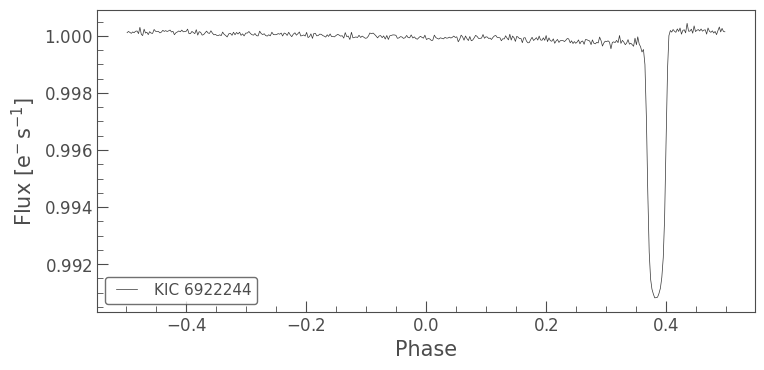

In [10]:
#all at once
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();